In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

#  REVENUE CSV FILES
path = "/Users/sabrinafernandez/Desktop/screentime2023.csv"
teenpath = "/Users/sabrinafernandez/Desktop/teenscreenclean.csv"

# Read the data
screentime = pd.read_csv(path)
teenscreen = pd.read_csv(teenpath)


In [3]:
cleanscreen = screentime.rename(columns={
     "Social Media Consumption (DW)": "Average Social Media Consumption (hours)"})

cleanteen= teenscreen.drop(columns=['How much time do you spend on physical activities in a day?',
                          'How much do you feel that you are exposed to inappropriate content on these platforms (out of 10)?',
                          'Have you ever been a victim of any of these cyber crimes?',
                          'Unnamed: 8', 'Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13'])

newcleanteen = cleanteen.rename(columns={
    "What is your age?": "Age",
    "Which social media platform/s do you like the most or use the most?": "Social Media Platforms",
    "How much time do you spend on social media in a day?": "Screentime per day",
    "Which type of communication do you generally prefer?": "Preferred Method of Communication"
})

screentime1=0
screentime2=0
screentime3=0
screentime4=0
screentime5=0

for line in newcleanteen['Screentime per day']:
    if line=='upto 4 hrs':
        screentime1=screentime1+4
        
    elif line=="more than 4 hrs":
        screentime2= screentime2+5
    
    elif line=="1 - 2.5 hrs":
        screentime3=screentime3+2.5
    
    elif line=="less than 1 hr":
        screentime4=screentime4+0.5
        
    elif line=="none":
        screentime5=0


In [4]:
screenmer = pd.concat([newcleanteen, cleanscreen], axis=0, ignore_index=True)

totalscreentime = screentime1 + screentime2 + screentime3 + screentime4 + screentime5
teenmeanscreen=round(int(totalscreentime)/291)

meanscreen = cleanscreen['Average Social Media Consumption (hours)'].mean()
finalmean = round(meanscreen)

print(f"The average screen time spent on social media for young adults aged 14 to 23 in 2018 is {teenmeanscreen} hours per day.")
print(f"The average screen time spent on social media globally from 2022 to 2023 is {finalmean} hours per day.")

The average screen time spent on social media for young adults aged 14 to 23 in 2018 is 3 hours per day.
The average screen time spent on social media globally from 2022 to 2023 is 2 hours per day.


In [6]:
screenmer

,Timestamp,Age,Social Media Platforms,Screentime per day,Preferred Method of Communication,Country,Average Social Media Consumption (hours)
0,Feb-18,19.0,"Whatsapp, Facebook, Instagram",upto 4 hrs,through phone,NaN,NaN
1,Feb-18,19.0,"Whatsapp, Facebook, Youtube, Instagram",more than 4 hrs,Text message,NaN,NaN
2,Feb-18,19.0,"Whatsapp, Facebook, Instagram",upto 4 hrs,through phone,NaN,NaN
3,Feb-18,19.0,"Whatsapp, Facebook, Youtube, Twitter",1 - 2.5 hrs,face to face,NaN,NaN
4,Feb-18,18.0,"Youtube, Instagram",upto 4 hrs,Text message,NaN,NaN
...,...,...,...,...,...,...,...
331,NaN,NaN,NaN,NaN,NaN,Turkey,2.54
332,NaN,NaN,NaN,NaN,NaN,United Arab Emirates,2.50
333,NaN,NaN,NaN,NaN,NaN,United Kingdom,1.56
334,NaN,NaN,NaN,NaN,NaN,United States of America,2.16


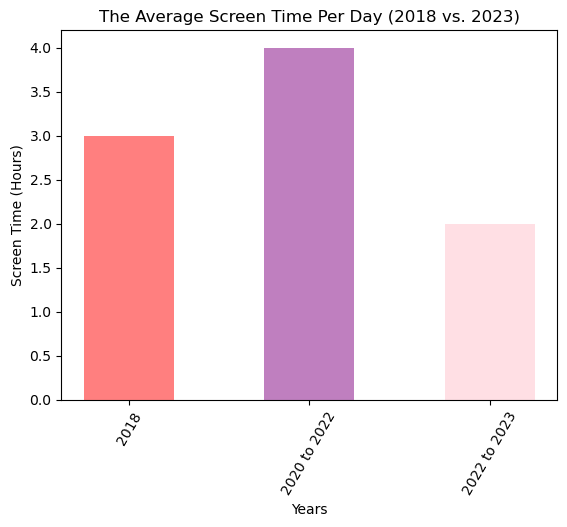

In [28]:
x_axis = ["2018", "2020 to 2022", "2022 to 2023"]
y_axis = [teenmeanscreen, 4, finalmean]
plt.xticks(rotation=60)
plt.bar(x_axis, y_axis, color=["red","purple", "pink"], alpha=0.5, width=0.5)
plt.xlabel("Years")
plt.ylabel("Screen Time (Hours)")
plt.title("The Average Screen Time Per Day (2018 vs. 2023)")
plt.show()